# Projeto Final - Fifa 18 More Complete Player Dataset

In [319]:
#importar todas as bibliotecas necessárias

import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math as math
from scipy import stats
import statsmodels.api as sm
from scipy.stats import uniform, expon, norm, probplot, percentileofscore, t

In [320]:
#rodar o dataset

fifa = pd.read_csv("CompleteDataset.csv")

C:\Users\VICTOR HABIB\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Análise exploratória

In [321]:
fifa.head(10)

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,9,G. Higuaín,29,https://cdn.sofifa.org/48/18/players/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,90,90,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


In [322]:
#remover itens que não serão úteis na análise

fifa_limpo = fifa.drop(columns=['Unnamed: 0', 'Photo', 'Flag', 'Club Logo'])

In [323]:
fifa_limpo.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228,89,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154,92,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100,94,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291,88,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,€92M,€355K,2143,79,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
6,De Gea,26,Spain,90,92,Manchester United,€64.5M,€215K,1458,57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,E. Hazard,26,Belgium,90,91,Chelsea,€90.5M,€295K,2096,93,...,59.0,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0
8,T. Kroos,27,Germany,90,90,Real Madrid CF,€79M,€340K,2165,60,...,76.0,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0
9,G. Higuaín,29,Argentina,90,90,Juventus,€77M,€275K,1961,78,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0


# Estatísticas descritivas

In [324]:
fifa_limpo.describe()

,Age,Overall,Potential,Special,CAM,CB,CDM,CF,CM,ID,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,17981.000000,17981.000000,17981.000000,17981.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,17981.000000,...,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000
mean,25.144541,66.247984,71.190813,1594.095100,59.251755,55.550464,56.865283,59.030028,58.506833,207658.710138,...,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.204050,59.359265,57.698721,58.204050
std,4.614272,6.987965,6.102199,272.151435,9.880164,12.192579,10.310178,9.926988,8.888040,32291.667313,...,9.791627,12.192579,8.888040,10.310178,9.926988,9.349180,9.181392,9.978084,9.142825,9.181392
min,16.000000,46.000000,46.000000,728.000000,27.000000,25.000000,26.000000,27.000000,30.000000,16.000000,...,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,31.000000
25%,21.000000,62.000000,67.000000,1449.000000,53.000000,45.000000,49.000000,53.000000,53.000000,192622.000000,...,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,52.000000
50%,25.000000,66.000000,71.000000,1633.000000,60.000000,57.000000,58.000000,60.000000,59.000000,214057.000000,...,58.000000,57.000000,59.000000,58.000000,60.000000,61.000000,59.000000,60.000000,58.000000,59.000000
75%,28.000000,71.000000,75.000000,1786.000000,66.000000,65.000000,65.000000,66.000000,65.000000,231448.000000,...,64.000000,65.000000,65.000000,65.000000,66.000000,67.000000,65.000000,66.000000,64.000000,65.000000
max,47.000000,94.000000,94.000000,2291.000000,92.000000,87.000000,85.000000,92.000000,87.000000,241219.000000,...,84.000000,87.000000,87.000000,85.000000,92.000000,90.000000,92.000000,91.000000,84.000000,92.000000


In [325]:
def troca(preco):
    multiplier = preco[-1]
    preco = preco[1:-1]
    
    if multiplier == "M":
        return float(preco) * 10**(6)
    elif multiplier == "K":
        return float(preco) * 10**(3)

In [326]:
lista = []
for x in fifa["Value"]:
    lista.append(troca(x))

In [327]:
fifa["Value"] = lista

In [328]:
fifa["Value"].head(10)

0     95500000.0
1    105000000.0
2    123000000.0
3     97000000.0
4     61000000.0
5     92000000.0
6     64500000.0
7     90500000.0
8     79000000.0
9     77000000.0
Name: Value, dtype: float64

# Distribuição das idades dos jogadores

In [329]:
#dados básicos de idade

fifa.Age.describe()

count    17981.000000
mean        25.144541
std          4.614272
min         16.000000
25%         21.000000
50%         25.000000
75%         28.000000
max         47.000000
Name: Age, dtype: float64

In [330]:
#média e desvio padrão mais precisos

media, dp = norm.fit(fifa.Age)

print('Média: {0}'.format(media))
print('Desvio Padrão: {0}'.format(dp))

Média: 25.144541460430453
Desvio Padrão: 4.614144033551294


In [331]:
#idade mínima e máxima

idade_min = 16
idade_max = 47

print('Idade do jogador mais jovem: {0} anos'.format(idade_min))
print('Idade do jogador mais velho: {0} anos'.format(idade_max))

Idade do jogador mais jovem: 16 anos
Idade do jogador mais velho: 47 anos


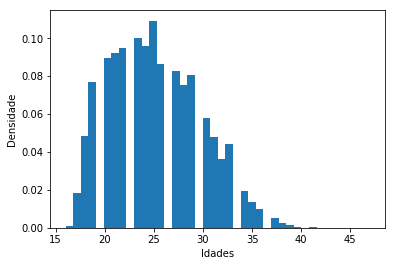

In [332]:
idades=[]
for dados_idade in fifa.Age:
    idades.append(dados_idade)
plt.hist(idades, density=True, bins= 40);
plt.ylabel('Densidade');
plt.xlabel('Idades');

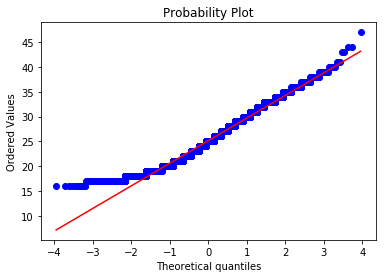

In [333]:
#Verificar graficamente se a distribuição normal é um modelo adequado para as idades dos jogadores

stats.probplot(idades, dist='norm', plot=plt);

Percebe-se que a distribuição normal pode ser considerada aceitável como modelo para as idades dos jogadores, pois grande parte dos pontos se encontram sobre a linha vermelha (diagonal). Entretanto não pode-se afirmar que é uma distribuição perfeita.

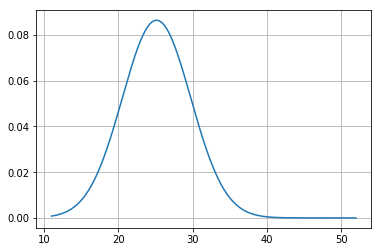

In [334]:
x = np.linspace(idade_min-5, idade_max+5, 1000)
y = norm.pdf(x, loc=media , scale=dp)
plt.plot(x, y)
plt.grid(True)
plt.show()

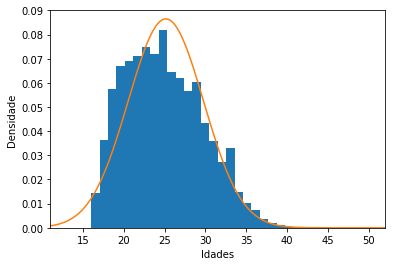

In [335]:
#plotar

plt.hist(idades, density=True, bins= 30)
plt.axis([idade_min-5, idade_max+5, 0, 0.09])
plt.ylabel('Densidade')
plt.xlabel('Idades')
plt.plot(x, y)
plt.show()

# Habilidade x Habilidades

In [336]:
player_attributes = pd.read_excel('AttributesDataset.xlsx')

In [337]:
player_attributes.dtypes

Acceleration          int64
Aggression            int64
Agility               int64
Balance               int64
Ball control          int64
Composure             int64
Crossing              int64
Curve                 int64
Dribbling             int64
Finishing             int64
Free kick accuracy    int64
GK diving             int64
GK handling           int64
GK kicking            int64
GK positioning        int64
GK reflexes           int64
Heading accuracy      int64
ID                    int64
Interceptions         int64
Jumping               int64
Long passing          int64
Long shots            int64
Marking               int64
Penalties             int64
Positioning           int64
Reactions             int64
Short passing         int64
Shot power            int64
Sliding tackle        int64
Sprint speed          int64
Stamina               int64
Standing tackle       int64
Strength              int64
Vision                int64
Volleys               int64
dtype: object

In [339]:
player_attributes

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,89,63,89,63,93,95,85,81,91,94,...,96,83,94,23,91,92,31,80,85,88
1,92,48,90,95,95,96,77,89,97,95,...,95,88,85,26,87,73,28,59,90,85
2,94,56,96,82,95,92,75,81,96,89,...,88,81,80,33,90,78,24,53,80,83
3,88,78,86,60,91,83,77,86,86,94,...,93,83,87,38,77,89,45,80,84,88
4,58,29,52,35,48,70,15,14,30,13,...,85,55,25,11,61,44,10,83,70,11
5,79,80,78,80,89,87,62,77,85,91,...,91,83,88,19,83,79,42,84,78,87
6,57,38,60,43,42,64,17,21,18,13,...,88,50,31,13,58,40,21,64,68,13
7,93,54,93,91,92,87,80,82,93,83,...,85,86,79,22,87,79,27,65,86,79
8,60,60,71,69,89,85,85,85,79,76,...,86,90,87,69,52,77,82,74,88,82
9,78,50,75,69,85,86,68,74,84,91,...,88,75,88,18,80,72,22,85,70,88


In [340]:
#def transforma_float(coluna):
    #player_attributes[coluna] = player_attributes[coluna].astype('float')

    

In [341]:
#transforma_float("Acceleration")

In [342]:
player_attributes.head(10)

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,89,63,89,63,93,95,85,81,91,94,...,96,83,94,23,91,92,31,80,85,88
1,92,48,90,95,95,96,77,89,97,95,...,95,88,85,26,87,73,28,59,90,85
2,94,56,96,82,95,92,75,81,96,89,...,88,81,80,33,90,78,24,53,80,83
3,88,78,86,60,91,83,77,86,86,94,...,93,83,87,38,77,89,45,80,84,88
4,58,29,52,35,48,70,15,14,30,13,...,85,55,25,11,61,44,10,83,70,11
5,79,80,78,80,89,87,62,77,85,91,...,91,83,88,19,83,79,42,84,78,87
6,57,38,60,43,42,64,17,21,18,13,...,88,50,31,13,58,40,21,64,68,13
7,93,54,93,91,92,87,80,82,93,83,...,85,86,79,22,87,79,27,65,86,79
8,60,60,71,69,89,85,85,85,79,76,...,86,90,87,69,52,77,82,74,88,82
9,78,50,75,69,85,86,68,74,84,91,...,88,75,88,18,80,72,22,85,70,88


Escolhendo variáveis

In [343]:
print(player_attributes.columns)

Index(['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'ID',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys'],
      dtype='object')


In [344]:
linhas = []
i = 0
while i < len(fifa["Unnamed: 0"]):
    linhas.append(fifa["Unnamed: 0"][i])
    i+=1

coluna = ['Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']

df = player_attributes.loc[linhas, coluna]
df

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,89,63,89,63,93,95,85,81,91,94,...,96,83,94,23,91,92,31,80,85,88
1,92,48,90,95,95,96,77,89,97,95,...,95,88,85,26,87,73,28,59,90,85
2,94,56,96,82,95,92,75,81,96,89,...,88,81,80,33,90,78,24,53,80,83
3,88,78,86,60,91,83,77,86,86,94,...,93,83,87,38,77,89,45,80,84,88
4,58,29,52,35,48,70,15,14,30,13,...,85,55,25,11,61,44,10,83,70,11
5,79,80,78,80,89,87,62,77,85,91,...,91,83,88,19,83,79,42,84,78,87
6,57,38,60,43,42,64,17,21,18,13,...,88,50,31,13,58,40,21,64,68,13
7,93,54,93,91,92,87,80,82,93,83,...,85,86,79,22,87,79,27,65,86,79
8,60,60,71,69,89,85,85,85,79,76,...,86,90,87,69,52,77,82,74,88,82
9,78,50,75,69,85,86,68,74,84,91,...,88,75,88,18,80,72,22,85,70,88


In [345]:
corr = df.corr()

In [346]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

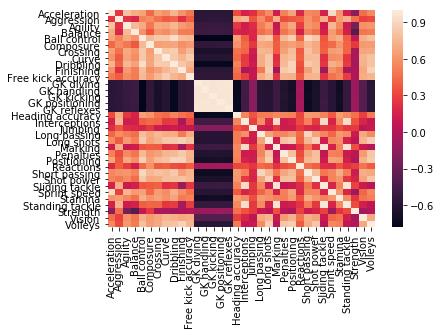

In [347]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)


# Distribuição Value

In [348]:
fifa.Value.describe()

count    1.772500e+04
mean     2.419841e+06
std      5.384761e+06
min      1.000000e+04
25%      3.250000e+05
50%      7.000000e+05
75%      2.100000e+06
max      1.230000e+08
Name: Value, dtype: float64

In [349]:
value_min = fifa.Value.min()
value_max = fifa.Value.max()

print('O jogador mais barato do jogo custa: €{:.2f}'.format(value_min))
print('O jogador mais caro do jogo custa: €{:.2f}'.format(value_max))

O jogador mais barato do jogo custa: €10000.00
O jogador mais caro do jogo custa: €123000000.00


In [369]:
value = fifa.Value.dropna()

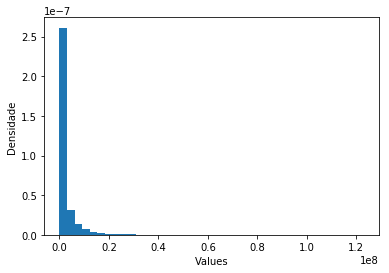

In [370]:
values=[]
for dados_value in value:
    values.append(dados_value)
plt.hist(values, density=True, bins= 40);
plt.ylabel('Densidade');
plt.xlabel('Values');

Percebe-se que há poucos jogadores que são classificados com alto valor de mercado. Esse critério se relaciona bastante com a realidade do futebol, em que tornar-se um jogador renomado, reconhecido e valorizado no mercado é muito raro.

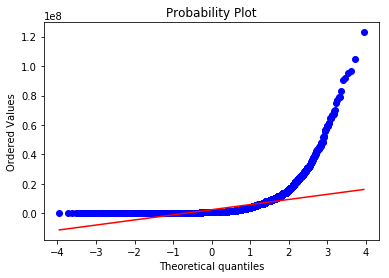

In [371]:
stats.probplot(values, dist='norm', plot=plt);

Dessa forma, baseando-se no histograma analisado acima, era de esperar que a distribuição de valores de mercado no mundo do futebol não se encaixa em uma curva normal.

# Value x Overall

In [283]:
fifa.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
fifa.dtypes

Unnamed: 0               int64
Name                    object
Age                      int64
Photo                   object
Nationality             object
Flag                    object
Overall                  int64
Potential                int64
Club                    object
Club Logo               object
Value                  float64
Wage                    object
Special                  int64
Acceleration            object
Aggression              object
Agility                 object
Balance                 object
Ball control            object
Composure               object
Crossing                object
Curve                   object
Dribbling               object
Finishing               object
Free kick accuracy      object
GK diving               object
GK handling             object
GK kicking              object
GK positioning          object
GK reflexes             object
Heading accuracy        object
                        ...   
Vision                  object
Volleys 

In [285]:
linhas = linhas
colunas = ["Overall", "Value"]

ovrl_value = fifa.loc[linhas, colunas]



In [286]:
ovrl_value

,Overall,Value
0,94,95500000.0
1,93,105000000.0
2,92,123000000.0
3,92,97000000.0
4,92,61000000.0
5,91,92000000.0
6,90,64500000.0
7,90,90500000.0
8,90,79000000.0
9,90,77000000.0


In [372]:
ovrl_value = ovrl_value.dropna()

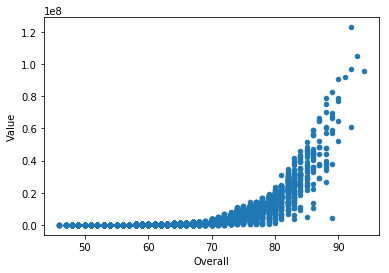

In [375]:
scatter = ovrl_value.plot.scatter(x= "Overall", y = "Value")
scatter

Ajuste linear entre X3 e X4:
Coeficiente linear: -29748061.320731457
Coeficiente angular: 485665.84831118427


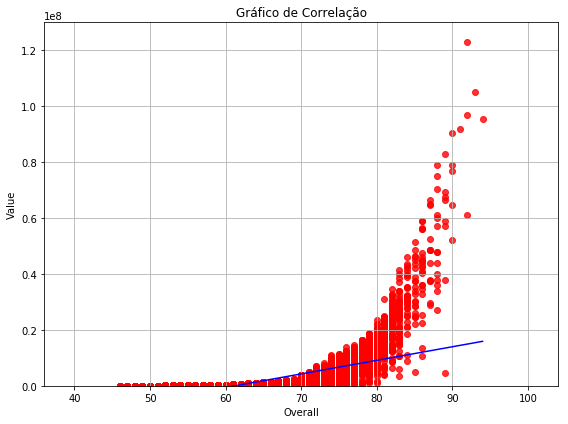

None


In [376]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('Gráfico de Correlação')
    plt.axis([overall_min-10, overall_max+10, -1000, 130000000])
    plt.xlabel('Overall')
    plt.ylabel('Value')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
print (reta(ovrl_value['Overall'], ovrl_value['Value']))

In [377]:
ovrl_value.corr()

,Overall,Value
Overall,1.000000,0.631265
Value,0.631265,1.000000


# Potencial x Idade

In [290]:
colunas = ["Age", "Overall", "Potential"]

pot_age_ovrl = fifa.loc[linhas, colunas]

#corr_pot_age = fifa.corr('Potential', 'Age')
pot_age_ovrl

,Age,Overall,Potential
0,32,94,94
1,30,93,93
2,25,92,94
3,30,92,92
4,31,92,92
5,28,91,91
6,26,90,92
7,26,90,91
8,27,90,90
9,29,90,90


In [291]:
#potencial = overall - potential

potencial = []
for dado1 in pot_age_ovrl.Potential:
    potencial.append(dado1)

overall = []
for dado2 in pot_age_ovrl.Overall:
    overall.append(dado2)
    

potencial_overall = []
i = 0
j = 0
while i < len(potencial):
    while j < len(overall):
        valor = potencial[i] - overall[j]
        potencial_overall.append(valor)
        j+=1
        i+=1
    


In [292]:
s = pd.Series(potencial_overall)


In [293]:
pot_age_ovrl['Evolução'] = s

In [294]:
pot_age_ovrl

,Age,Overall,Potential,Evolução
0,32,94,94,0
1,30,93,93,0
2,25,92,94,2
3,30,92,92,0
4,31,92,92,0
5,28,91,91,0
6,26,90,92,2
7,26,90,91,1
8,27,90,90,0
9,29,90,90,0


In [295]:
corr_potencial_idade =  pot_age_ovrl.corr()

In [296]:
corr_potencial_idade

,Age,Overall,Potential,Evolução
Age,1.000000,0.459765,-0.218264,-0.862277
Overall,0.459765,1.000000,0.683474,-0.534526
Potential,-0.218264,0.683474,1.000000,0.251605
Evolução,-0.862277,-0.534526,0.251605,1.000000


In [297]:
colunas = ["Age", "Evolução"]



pot_age = pot_age_ovrl.loc[linhas, colunas]

In [298]:
pot_age

,Age,Evolução
0,32,0
1,30,0
2,25,2
3,30,0
4,31,0
5,28,0
6,26,2
7,26,1
8,27,0
9,29,0


Ajuste linear entre X3 e X4:
Coeficiente linear: 29.708323020232875
Coeficiente angular: -0.9849252776380094


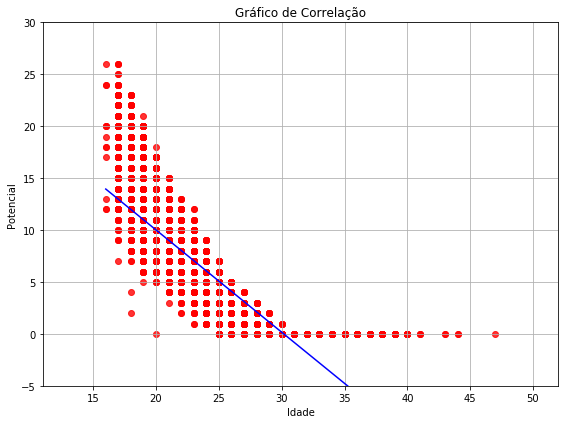

None


In [299]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('Gráfico de Correlação')
    plt.axis([idade_min-5, idade_max+5, -5, 30])
    plt.xlabel('Idade')
    plt.ylabel('Potencial')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
print (reta(pot_age['Age'], pot_age['Evolução']))

In [300]:
pot_age.corr()

,Age,Evolução
Age,1.000000,-0.862277
Evolução,-0.862277,1.000000


Percebe-se que a idade e o potencial que o jogador tem para aprimorar suas habilidades se correlacionam de modo que os jogadores mais jovens são mais aptos a se desenvolverem no jogo, enquanto os mais velhos não possuem tal potencial.

# IDADE X OVERALL

In [301]:
linhas = linhas
colunas = ["Age", "Overall"]
age_ovrl = fifa.loc[linhas, colunas]

In [302]:
age_ovrl

,Age,Overall
0,32,94
1,30,93
2,25,92
3,30,92
4,31,92
5,28,91
6,26,90
7,26,90
8,27,90
9,29,90


In [303]:
corr_age_ovrl = age_ovrl.corr()

In [304]:
corr_age_ovrl

,Age,Overall
Age,1.000000,0.459765
Overall,0.459765,1.000000


Ajuste linear entre X3 e X4:
Coeficiente linear: 48.74036569110732
Coeficiente angular: 0.6962790838535429


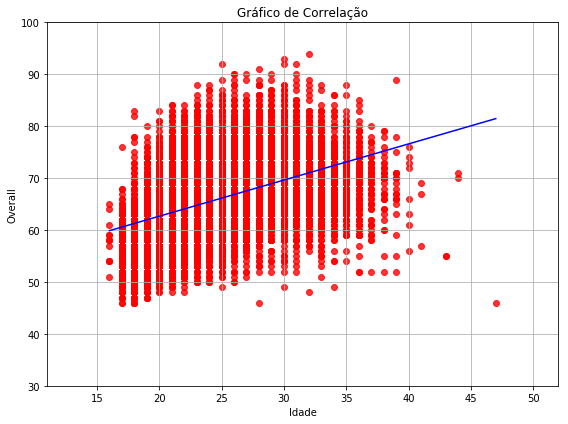

None


In [305]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('Gráfico de Correlação')
    plt.axis([idade_min-5, idade_max+5, 30, 100])
    plt.xlabel('Idade')
    plt.ylabel('Overall')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
print (reta(age_ovrl['Age'], age_ovrl['Overall']))

Percebe-se que a idade não se correlaciona com as qualidades do jogador (overall). Assim, é viável afirmar que há jogadores jovens tão bons quanto jogadores mais velhos.

# Distribuição Overall

In [306]:
fifa_limpo.Overall.describe()

count    17981.000000
mean        66.247984
std          6.987965
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64

In [307]:
media, dp = norm.fit(fifa.Overall)

print('Média: {0}'.format(media))
print('Desvio Padrão: {0}'.format(dp))

Média: 66.24798398309326
Desvio Padrão: 6.98777102178669


In [308]:
overall_min = 46
overall_max = 94

print('Overall mais baixo do jogo: {0}'.format(overall_min))
print('Overall mais alto do jogo: {0}'.format(overall_max))

Overall mais baixo do jogo: 46
Overall mais alto do jogo: 94


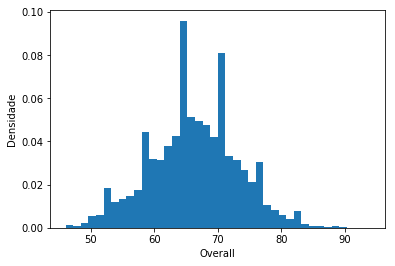

In [309]:
overalls=[]
for dados_overall in fifa.Overall:
    overalls.append(dados_overall)
plt.hist(overalls, density=True, bins= 40);
plt.ylabel('Densidade');
plt.xlabel('Overall');

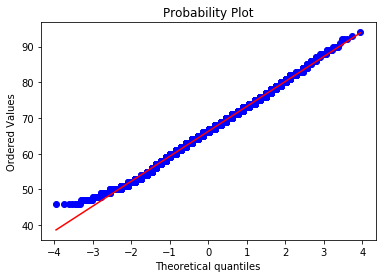

In [310]:
#Verificar graficamente se a distribuição normal é um modelo adequado para o overall dos jogadores

stats.probplot(overalls, dist='norm', plot=plt);

Percebe-se que a distribuição normal pode ser considerada aceitável como modelo para o overall dos jogadores, pois grande parte dos pontos se encontram sobre a linha vermelha (diagonal).

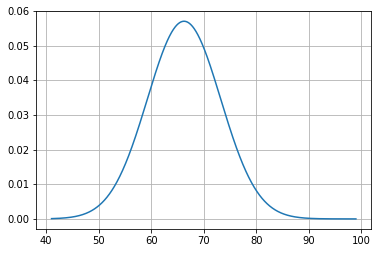

In [311]:
x = np.linspace(overall_min-5, overall_max+5, 1000)
y = norm.pdf(x, loc=media , scale=dp)
plt.plot(x, y)
plt.grid(True)
plt.show()

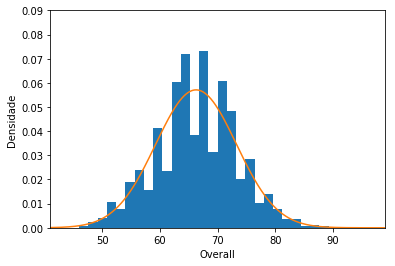

In [312]:
#plotar

plt.hist(overalls, density=True, bins= 30)
plt.axis([overall_min-5, overall_max+5, 0, 0.09])
plt.ylabel('Densidade')
plt.xlabel('Overall')
plt.plot(x, y)
plt.show()

# Value x Preferred Position

In [313]:
linhas = linhas
colunas = ["Preferred Positions", "Value"]

pos_value = fifa.loc[linhas, colunas]

In [314]:
pos_value

,Preferred Positions,Value
0,ST LW,95500000.0
1,RW,105000000.0
2,LW,123000000.0
3,ST,97000000.0
4,GK,61000000.0
5,ST,92000000.0
6,GK,64500000.0
7,LW,90500000.0
8,CDM CM,79000000.0
9,ST,77000000.0


In [367]:
#fazer um programa ou funcao que separa os termos por espaço em cada linha da coluna Preferred Positions, depois selecionar o 
#primeiro termo e deletar o resto (de 2 a 3 caracteres) ----------- EX: ST RM ---função---> ST // CAM RM LM ---função---> CAM    